## Binary Classification: Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.4
numpy   version = 1.19.4
seaborn version = 0.11.0


### data source
https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study

In [10]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


/home/wichu/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


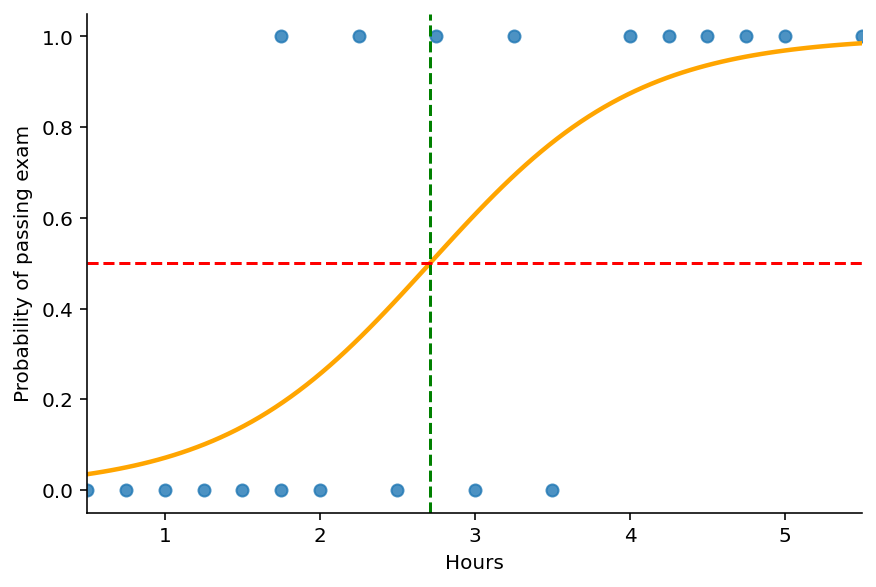

In [11]:
sns.lmplot(x='Hours', y='Pass', data=df,
           logistic=True, height=4, aspect=1.5, 
           line_kws={'color': 'orange'})
plt.ylabel('Probability of passing exam');
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--');

# Scikit-learn: LogisticRegression
doc: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [12]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
print(f"sklearn version = {sklearn.__version__}")

sklearn version = 0.24.0


In [15]:
 test_size=0.05
#test_size=0
X_train, X_test, y_train, y_test = train_test_split(df[['Hours']], df.Pass, test_size=test_size, random_state=3)

In [16]:
X_train # pandas DataFrame

,Hours
2,1.00
1,0.75
17,4.75
4,1.50
16,4.50
6,1.75
7,2.00
15,4.25
12,3.25
9,2.50


In [17]:
y_train # pandas Series

2     0
1     0
17    1
4     0
16    1
6     1
7     0
15    1
12    1
9     0
11    0
19    1
18    1
13    0
5     0
0     0
8     1
3     0
10    1
Name: Pass, dtype: int64

In [18]:
model = LogisticRegression()
model

LogisticRegression()

In [19]:
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
model.score(X_train, y_train) # accuracy of the model

0.7368421052631579

In [21]:
predicted = model.predict(X_train)
predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [22]:
y_train.values

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

## Confusion matrix

In [23]:
from sklearn import metrics
# from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

### further reading:
* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
* https://en.wikipedia.org/wiki/Confusion_matrix

In [24]:
X_train['Hours'].values

array([1.  , 0.75, 4.75, 1.5 , 4.5 , 1.75, 2.  , 4.25, 3.25, 2.5 , 3.  ,
       5.5 , 5.  , 3.5 , 1.75, 0.5 , 2.25, 1.25, 2.75])

In [25]:
y_train.values

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [26]:
predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

## scikit-learn: confusion matrix
$$
\begin{bmatrix}
C_{0,0} & C_{0,1} \\
C_{1,0} & C_{1,1}
\end{bmatrix}
=
\begin{bmatrix}
tn&fp \\
fn&tp
\end{bmatrix}
$$

<table>
<tr>
    <td></td>
    <td>predicted false</td>
    <td>predicted true</td>
</tr>
<tr>
    <td>actual false</td>
    <td>tn</td>
    <td>fp</td>
</tr>
<tr>
    <td>actual true</td>
    <td>fn</td>
    <td>tp</td>
</tr>
<table>

In [28]:
metrics.confusion_matrix(y_train,predicted)

array([[8, 2],
       [3, 6]])

In [29]:
pd.crosstab(y_train.values, predicted)

col_0,0,1
row_0,,
0,8,2
1,3,6


In [20]:
dd=pd.DataFrame({'actual': y_train.values, 'predicted': predicted})
dd

,actual,predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,1,0
7,0,0
8,1,1
9,1,1


In [21]:
pd.crosstab(dd['actual'], dd['predicted'])

predicted,0,1
actual,,
0,7,3
1,1,9


In [22]:
metrics.confusion_matrix(y_train, predicted)

array([[7, 3],
       [1, 9]])

In [23]:
pd.DataFrame(metrics.confusion_matrix(y_train, predicted), 
             columns=['pred_fail', 'pred_pass'],
             index=['actual_fail', 'actual_pass'])

,pred_fail,pred_pass
actual_fail,7,3
actual_pass,1,9


In [24]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted).ravel()

$$Accuracy={\frac {{TP+TN} }{TP + TN +FP + FN} }\\
Precision={\frac {TP}{TP+FP}}\\
Recall={\frac {TP}{TP+FN}}\\
F1 = 2 \times {\frac {precision \times recall} {precision + recall}}
$$

In [25]:
(tp+tn)/(tp+tn+fp+fn) # accuracy score

0.8

In [26]:
metrics.accuracy_score(y_train, predicted)

0.8

In [27]:
metrics.precision_score(y_train, predicted)

0.75

In [28]:
tp/(tp+fp) # precision score

0.75

In [29]:
metrics.recall_score(y_train, predicted)

0.9

In [30]:
tp/(tp+fn) # recall score

0.9

In [31]:
metrics.f1_score(y_train, predicted)

0.8181818181818182

In [32]:
print(metrics.classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.75      0.90      0.82        10

   micro avg       0.80      0.80      0.80        20
   macro avg       0.81      0.80      0.80        20
weighted avg       0.81      0.80      0.80        20



In [33]:
tn/(tn+fn) # precision (class=0)

0.875

In [34]:
tn/(tn+fp) # recall (class=0)

0.7